In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r'customer_churn_large_dataset.xlsx')
df=pd.DataFrame(data)
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [3]:
df=df.drop(columns=['CustomerID','Name'])

In [4]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


In [6]:
df.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


In [7]:
df.isnull().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
label_Encoder=LabelEncoder()
df['Gender']=label_Encoder.fit_transform(df['Gender'])

In [9]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,Los Angeles,17,73.36,236,0
1,62,0,New York,1,48.76,172,0
2,24,0,Los Angeles,5,85.47,460,0
3,36,0,Miami,3,97.94,297,1
4,46,0,Miami,19,58.14,266,0


<Axes: >

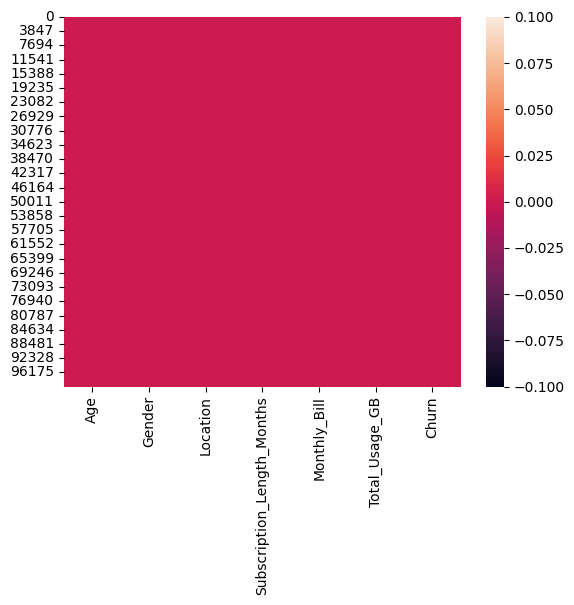

In [10]:
sns.heatmap(df.isnull())

C:\Users\Gyanender\AppData\Local\Temp\ipykernel_19552\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

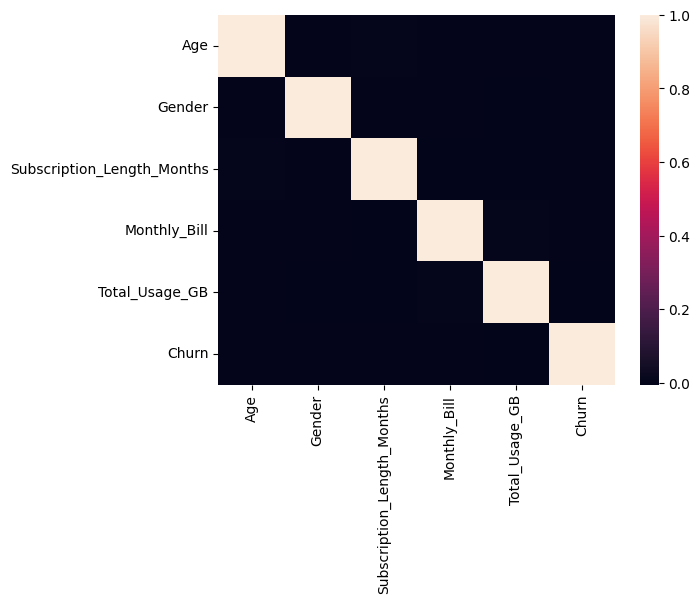

In [11]:
sns.heatmap(df.corr())

In [12]:
unique_values=df['Location'].unique()
unique_values


array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [13]:
location_dict = {}
for key, value in enumerate(unique_values):
    location_dict[value] = key

print(location_dict)
df['Location'] = df['Location'].map(location_dict)

{'Los Angeles': 0, 'New York': 1, 'Miami': 2, 'Chicago': 3, 'Houston': 4}


In [14]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,0,17,73.36,236,0
1,62,0,1,1,48.76,172,0
2,24,0,0,5,85.47,460,0
3,36,0,2,3,97.94,297,1
4,46,0,2,19,58.14,266,0


In [15]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,test_size=0.2)

<Axes: xlabel='Churn', ylabel='count'>

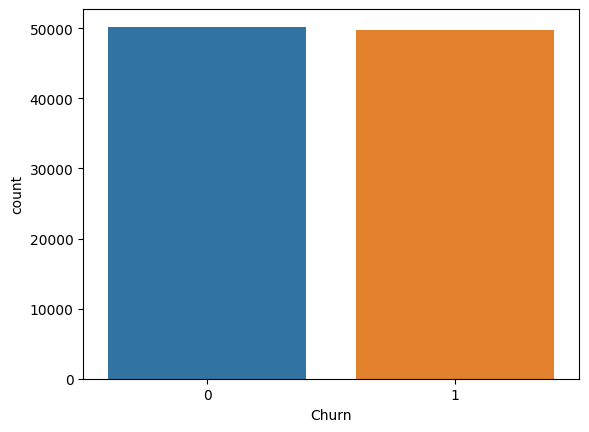

In [20]:
sns.countplot(data=df,x='Churn')

In [21]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
y_pred=model.predict(x_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.53      0.52      9975
           1       0.50      0.48      0.49     10025

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



[[5289 4686]
 [5263 4762]]


<Axes: >

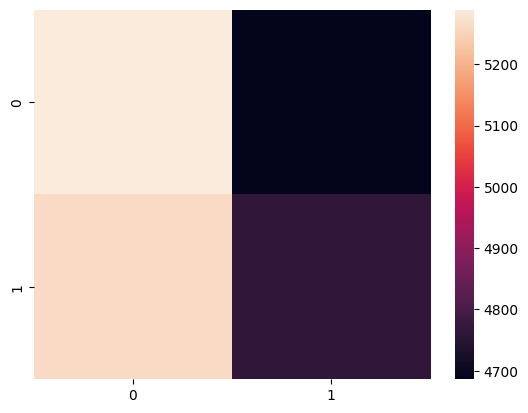

In [24]:
cmatrix=confusion_matrix(y_test,y_pred)
print(cmatrix)
sns.heatmap(cmatrix)

In [25]:
score=accuracy_score(y_test,y_pred)
print(score)

0.50255


In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [28]:
x=sc.fit_transform(x)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,test_size=0.2)

In [30]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
y_pred=model.predict(x_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.53      0.51      9975
           1       0.50      0.47      0.49     10025

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

